In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("C:/Users/Maihar_nikku/Downloads/machine_learning_bi-main/machine_learning_bi-main/#2 Wine quality prediction/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

In [9]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [10]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

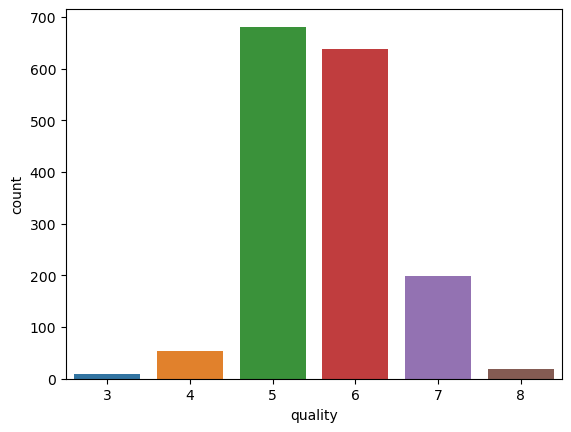

In [13]:
sns.countplot(x = 'quality',data = df)

In [14]:
df['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [15]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [16]:
df['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [17]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [18]:
print(df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR)) 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [19]:
df_out = df[~((df < (q1 - 1.5*IQR)) | (df>(q3+1.5*IQR))).any(axis = 1)]

In [20]:
df_out.shape

(1179, 12)

In [21]:
df_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
correlation = df_out.corr()['quality'].drop('quality')

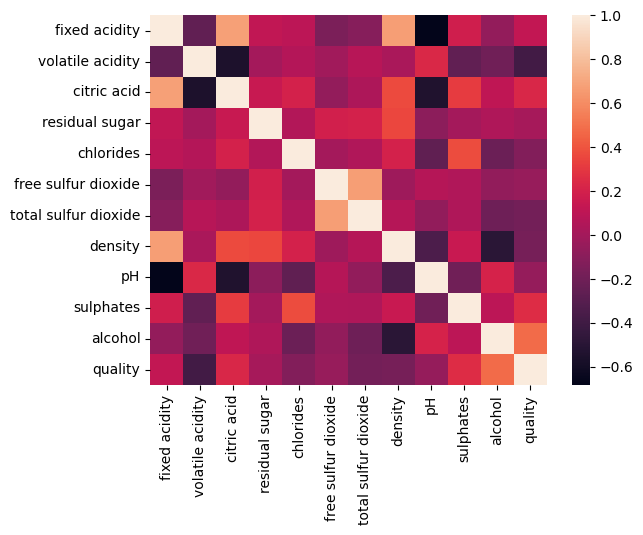

In [23]:
sns.heatmap(df.corr())
plt.show()

In [24]:
correlation.sort_values(ascending = False)

alcohol                 0.492551
sulphates               0.413533
citric acid             0.212133
fixed acidity           0.113422
residual sugar          0.007934
free sulfur dioxide    -0.003609
pH                     -0.060288
chlorides              -0.190869
total sulfur dioxide   -0.203374
density                -0.215375
volatile acidity       -0.346962
Name: quality, dtype: float64

In [28]:
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlation = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlation

In [31]:
features = get_features(0.05)
print(features)
x = df_out[features]
y = df_out['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Alcohol'),
 Text(0.5, 1.0, 'Alcohol % in different samples')]

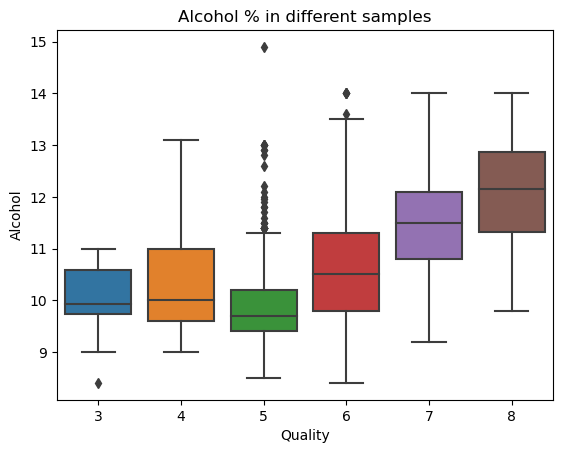

In [30]:
bx = sns.boxplot(x = 'quality', y = 'alcohol', data = df)
bx.set(xlabel = 'Quality', ylabel = 'Alcohol',title = "Alcohol % in different samples")

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'citric acid'),
 Text(0.5, 1.0, 'citric acid % in different samples')]

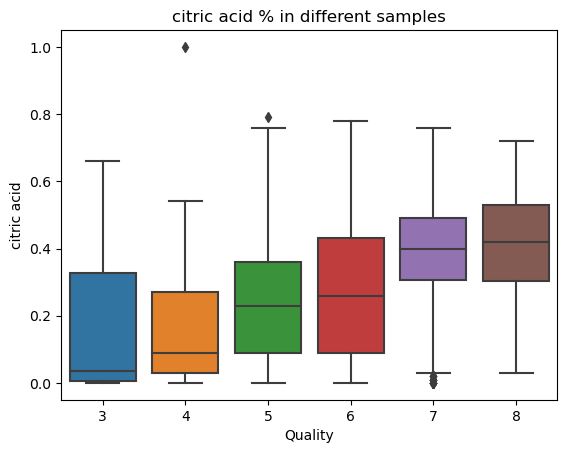

In [32]:
bx = sns.boxplot(x = 'quality', y = 'citric acid', data = df)
bx.set(xlabel = 'Quality', ylabel = 'citric acid',title = "citric acid % in different samples")

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'fixed acidity'),
 Text(0.5, 1.0, 'fixed acidity % in different samples')]

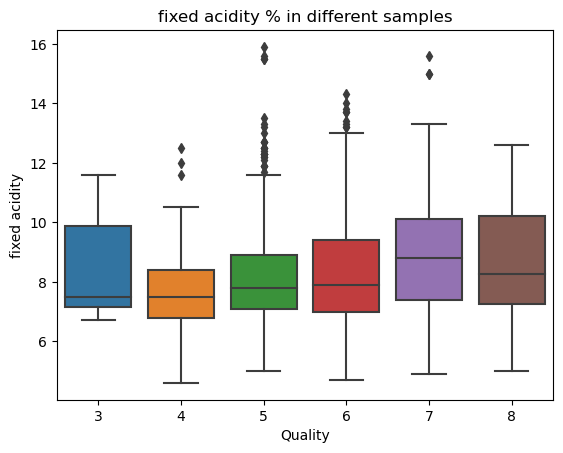

In [33]:
bx = sns.boxplot(x = 'quality', y = 'fixed acidity', data = df)
bx.set(xlabel = 'Quality', ylabel = 'fixed acidity',title = "fixed acidity % in different samples")

In [34]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [35]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 3)

In [37]:
y_test.shape

(354,)

In [38]:
x_test.shape

(354, 9)

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(x_train,y_train)

LinearRegression()

In [41]:
regressor.intercept_

27.670573863574546

In [42]:
regressor.coef_

array([ 4.22974781e-02, -8.16827531e-01, -4.00865196e-01, -2.68428276e+00,
       -1.47339257e-03, -2.37486638e+01, -4.72842021e-01,  1.71236742e+00,
        2.47526682e-01])

In [43]:
train_pred = regressor.predict(x_train)
train_pred

array([6.14356299, 5.11710037, 5.21197237, 5.13828062, 5.97949972,
       5.66562893, 5.4777587 , 5.75868703, 5.98907913, 5.40401462,
       5.52303708, 5.21113234, 5.38046811, 5.75877598, 5.35007708,
       5.08567146, 5.70418446, 6.15016457, 4.98217495, 6.37902248,
       5.34435775, 5.58388766, 5.56975986, 6.5429133 , 5.95905468,
       5.36649122, 5.24598625, 5.58550515, 5.18791293, 5.25072061,
       5.10187748, 5.00442024, 5.69182774, 5.89415555, 5.21543362,
       5.72691046, 5.08042222, 5.16537087, 6.26665775, 5.11379649,
       4.84031354, 5.32908031, 6.59578316, 5.9574155 , 5.17612261,
       5.52155991, 5.08413929, 6.1392644 , 5.48990749, 5.93825753,
       6.23616917, 5.92388793, 5.7786765 , 6.0650639 , 5.79356716,
       5.78930793, 6.0279377 , 4.86136512, 6.06957539, 5.1960625 ,
       5.82623979, 5.21010511, 5.18855806, 5.17190517, 5.06530766,
       5.2522647 , 5.64833165, 5.66231692, 5.54553416, 5.89096209,
       5.29556643, 5.10200981, 5.02472467, 5.47288678, 5.45596

In [44]:
test_pred = regressor.predict(x_test)
test_pred

array([5.31808602, 5.58846727, 5.83179258, 5.23562426, 6.36492755,
       5.75166188, 5.61511554, 6.51307801, 6.033911  , 5.66126467,
       5.15680921, 5.48432811, 5.53204251, 5.17612261, 5.98484046,
       5.76958525, 6.09867422, 5.24902132, 5.45163284, 5.31035025,
       5.09350311, 5.87828479, 6.40866401, 5.412199  , 5.96442862,
       5.64014045, 5.51992784, 5.13588457, 6.28333602, 5.24519459,
       5.0320614 , 5.27962193, 5.59753018, 5.48395895, 5.58964467,
       6.0845468 , 5.19985585, 6.19604141, 5.34136276, 5.46949893,
       5.52658067, 5.96992765, 5.69237733, 6.52259415, 5.39271847,
       5.25392748, 5.99084808, 5.47407662, 5.49640697, 5.43513813,
       6.32835806, 6.16672701, 6.20060859, 5.78978599, 5.70708754,
       5.27350261, 5.36347142, 5.35513893, 6.26073939, 5.39379095,
       5.13365707, 5.39539395, 5.31604688, 5.55738131, 5.35711922,
       5.41823198, 5.04290802, 5.63751858, 5.05701887, 5.37699259,
       5.4916961 , 6.49050987, 5.67902012, 5.58946844, 5.62497

In [45]:
train_rmse = metrics.mean_squared_error(train_pred,y_train)**0.5
train_rmse

0.5716073011879284

In [46]:
test_rmse = metrics.mean_squared_error(test_pred,y_test)**0.5
test_rmse

0.5670861234989517

In [47]:
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., 5., 6., 6., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 6.,
       5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5.,
       6., 6., 5., 6., 5., 5., 6., 6., 6., 7., 5., 5., 6., 5., 5., 5., 6.,
       6., 6., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 5., 5., 6.,
       5., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 7., 6., 6.,
       5., 6., 6., 6., 6., 6., 5., 6., 7., 6., 5., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 5., 7., 6., 6., 5., 6., 6., 5., 5., 5.,
       5., 5., 7., 7., 5., 6., 6., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6.,
       5., 6., 5., 5., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5., 5., 6., 6.,
       5., 6., 5., 5., 5., 6., 5., 7., 6., 6., 6., 5., 6., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 6., 6., 6., 5., 5., 7., 6., 5., 5., 6., 5., 6.,
       6., 6., 6., 5., 5., 6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 5.,
       5., 6., 6., 6., 6.

In [48]:
metrics.mean_absolute_error(y_test,test_pred)

0.4566775059053299

In [49]:
metrics.mean_squared_error(y_test,test_pred)

0.32158667146506836

In [50]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,test_pred))
rmse

0.5670861234989517

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred)

0.4070484025407709

In [52]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.042297
volatile acidity,-0.816828
citric acid,-0.400865
chlorides,-2.684283
total sulfur dioxide,-0.001473
density,-23.748664
pH,-0.472842
sulphates,1.712367
alcohol,0.247527
